### 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('L_runs.csv')

In [4]:
data.columns

Index(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'CG_CK', 'WLS', 'HOLD', 'INN2',
       'BF', 'PA', 'AB', 'HIT', 'H1', 'H2', 'H3', 'HR', 'SB', 'CS', 'SH', 'SF',
       'BB', 'IB', 'HP', 'KK', 'GD', 'WP', 'BK', 'Pitcher_ERR', 'R', 'ER',
       'P_WHIP_RT', 'P2_WHIP_RT', 'CB_WHIP_RT', 'K/BB', 'OOPS', 'WHIP',
       'BABIP', 'kFIP', 'HEADER_NO_1', 'HEADER_NO_2', 'TB_SC_T', 'Hitter_ERR'],
      dtype='object')

In [5]:
data=data.loc[-data['G_ID'].str.contains('2020')]

## **Random Forest**
test set을 다르게 정해서 각각의 스코어 살피고 가장 좋은 스코어를 내는 test set 방식을 채택

### 1. train/test; 19년도 끝에서 188경기만 test로
전체 데이터중 16년~19년 초->train set/ 19년말 188경기-> test set

In [7]:
train = data.iloc[:-188]
valid = data.iloc[-188:]
train=train.drop(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'WLS','ER'],axis=1)
valid=valid.drop(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'WLS','ER'],axis=1)

In [9]:
X_train=train.drop(['R'],axis=1)
X_test= valid.drop(['R'],axis=1)
y_train=train[['R']]
y_test= valid[['R']]

In [10]:
y_test.shape

(188, 1)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [12]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [13]:
pred= rf.predict(X_test)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9800531863494186
0.8643697316631911


그리드서치...?

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
best_score=0
for n_estimator in [100,150,200,250]:
    for max_depth in [None,6,9,12]:
        for min_samples_split in [0.01, 0.05, 0.1]:
            for max_features in ['auto', 'sqrt']:
                forest= RandomForestRegressor(n_estimators=n_estimator,
                                             max_depth=max_depth,
                                             min_samples_split= min_samples_split,
                                             max_features=max_features)
                forest.fit(X_train, y_train)
                score=forest.score(X_test, y_test)
                
                if score > best_score:
                    best_score = score
                    best_parameters = {'n_estimators':n_estimator, 'max_depth' : max_depth,
                                        'min_samples_split' : min_samples_split,
                                        'max_features':max_features}
                    
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.86
Best parameters: {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 0.01, 'max_features': 'auto'}


### 2. '16~'19 매년 끝 188개를 test로

In [16]:
data.head()

,G_ID,GDAY_DS,T_ID,VS_T_ID,CG_CK,WLS,HOLD,INN2,BF,PA,...,CB_WHIP_RT,K/BB,OOPS,WHIP,BABIP,kFIP,HEADER_NO_1,HEADER_NO_2,TB_SC_T,Hitter_ERR
0,20160401HHLG0,20160401,LG,HH,0,W,0,36,184,0.729167,...,0.200000,0.238095,0.652618,0.295302,0.361111,0.100408,0,0,0,0.0
1,20160401HHLG0,20160401,HH,LG,0,L,0,34,196,0.625000,...,0.062500,0.196429,0.615942,0.250296,0.266667,0.186543,0,0,1,0.4
2,20160401HTNC0,20160401,NC,HT,0,W,0,27,143,0.437500,...,0.178571,0.238095,0.727554,0.268456,0.304348,0.214354,0,0,0,0.2
3,20160401HTNC0,20160401,HT,NC,0,L,0,24,147,0.395833,...,0.156250,0.128571,0.966667,0.395973,0.368421,0.365714,0,0,1,0.0
4,20160401KTSK0,20160401,SK,KT,0,L,0,27,151,0.520833,...,0.187500,0.125000,0.853175,0.375839,0.321429,0.350408,0,0,0,0.2


In [18]:
data2016 =data.loc[data['G_ID'].str.contains('2016')]
train2016 = data2016.iloc[:-188]
valid2016 = data2016.iloc[-188:]

data2017 =data.loc[data['G_ID'].str.contains('2017')]
train2017 = data2017.iloc[:-188]
valid2017 = data2017.iloc[-188:]

data2018 =data.loc[data['G_ID'].str.contains('2018')]
train2018 = data2018.iloc[:-188]
valid2018 = data2018.iloc[-188:]

data2019 =data.loc[data['G_ID'].str.contains('2019')]
train2019 = data2019.iloc[:-188]
valid2019 = data2019.iloc[-188:]

train=pd.concat([train2016,train2017,train2018, train2019],axis=0)
valid=pd.concat([valid2016,valid2017, valid2018, valid2019],axis=0)

In [20]:
train=train.drop(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'WLS','ER'],axis=1)
valid=valid.drop(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'WLS','ER'],axis=1)

In [21]:
X_train=train.drop(['R'],axis=1)
X_test= valid.drop(['R'],axis=1)
y_train=train[['R']]
y_test= valid[['R']]

In [22]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [23]:
pred= rf.predict(X_test)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

0.9797112161234798
0.8755977248000496


그리드 서치

In [24]:
best_score=0
for n_estimator in [100,150,200,250]:
    for max_depth in [None,6,9,12]:
        for min_samples_split in [0.01, 0.05, 0.1]:
            for max_features in ['auto', 'sqrt']:
                forest= RandomForestRegressor(n_estimators=n_estimator,
                                             max_depth=max_depth,
                                             min_samples_split= min_samples_split,
                                             max_features=max_features)
                forest.fit(X_train, y_train)
                score=forest.score(X_test, y_test)
                
                if score > best_score:
                    best_score = score
                    best_parameters = {'n_estimators':n_estimator, 'max_depth' : max_depth,
                                        'min_samples_split' : min_samples_split,
                                        'max_features':max_features}
                    
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.87
Best parameters: {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 0.01, 'max_features': 'auto'}


### 3. 16~19년, 연도별로 따로 끝에서 188개 test set으로 만들고, 연도별로 각각 돌려보기 

In [29]:
data2016 =data.loc[data['G_ID'].str.contains('2016')]
train2016 = data2016.iloc[:-188]
valid2016 = data2016.iloc[-188:]

data2017 =data.loc[data['G_ID'].str.contains('2017')]
train2017 = data2017.iloc[:-188]
valid2017 = data2017.iloc[-188:]

data2018 =data.loc[data['G_ID'].str.contains('2018')]
train2018 = data2018.iloc[:-188]
valid2018 = data2018.iloc[-188:]

data2019 =data.loc[data['G_ID'].str.contains('2019')]
train2019 = data2019.iloc[:-188]
valid2019 = data2019.iloc[-188:]

In [30]:
train2016=train2016.drop(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'WLS','ER'],axis=1)
valid2016=valid2016.drop(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'WLS','ER'],axis=1)

train2017=train2017.drop(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'WLS','ER'],axis=1)
valid2017=valid2017.drop(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'WLS','ER'],axis=1)

train2018=train2018.drop(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'WLS','ER'],axis=1)
valid2018=valid2018.drop(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'WLS','ER'],axis=1)

train2019=train2019.drop(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'WLS','ER'],axis=1)
valid2019=valid2019.drop(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'WLS','ER'],axis=1)

In [31]:
X_train2016=train.drop(['R'],axis=1);X_test2016= valid.drop(['R'],axis=1)
y_train2016=train[['R']];y_test2016= valid[['R']]
X_train2017=train.drop(['R'],axis=1);X_test2017= valid.drop(['R'],axis=1)
y_train2017=train[['R']];y_test2017= valid[['R']]
X_train2018=train.drop(['R'],axis=1);X_test2018= valid.drop(['R'],axis=1)
y_train2018=train[['R']];y_test2018= valid[['R']]
X_train2019=train.drop(['R'],axis=1);X_test2019= valid.drop(['R'],axis=1)
y_train2019=train[['R']];y_test2019= valid[['R']]

In [32]:
best_score=0
for n_estimator in [100,150,200,250]:
    for max_depth in [None,6,9,12]:
        for min_samples_split in [0.01, 0.05, 0.1]:
            for max_features in ['auto', 'sqrt']:
                forest= RandomForestRegressor(n_estimators=n_estimator,
                                             max_depth=max_depth,
                                             min_samples_split= min_samples_split,
                                             max_features=max_features)
                forest.fit(X_train2016, y_train2016)
                score=forest.score(X_test2016, y_test2016)
                
                if score > best_score:
                    best_score = score
                    best_parameters = {'n_estimators':n_estimator, 'max_depth' : max_depth,
                                        'min_samples_split' : min_samples_split,
                                        'max_features':max_features}
                    
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.87
Best parameters: {'n_estimators': 150, 'max_depth': None, 'min_samples_split': 0.01, 'max_features': 'auto'}


In [33]:
best_score=0
for n_estimator in [100,150,200,250]:
    for max_depth in [None,6,9,12]:
        for min_samples_split in [0.01, 0.05, 0.1]:
            for max_features in ['auto', 'sqrt']:
                forest= RandomForestRegressor(n_estimators=n_estimator,
                                             max_depth=max_depth,
                                             min_samples_split= min_samples_split,
                                             max_features=max_features)
                forest.fit(X_train2017, y_train2017)
                score=forest.score(X_test2017, y_test2017)
                
                if score > best_score:
                    best_score = score
                    best_parameters = {'n_estimators':n_estimator, 'max_depth' : max_depth,
                                        'min_samples_split' : min_samples_split,
                                        'max_features':max_features}
                    
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.87
Best parameters: {'n_estimators': 250, 'max_depth': None, 'min_samples_split': 0.01, 'max_features': 'auto'}


In [34]:
best_score=0
for n_estimator in [100,150,200,250]:
    for max_depth in [None,6,9,12]:
        for min_samples_split in [0.01, 0.05, 0.1]:
            for max_features in ['auto', 'sqrt']:
                forest= RandomForestRegressor(n_estimators=n_estimator,
                                             max_depth=max_depth,
                                             min_samples_split= min_samples_split,
                                             max_features=max_features)
                forest.fit(X_train2018, y_train2018)
                score=forest.score(X_test2018, y_test2018)
                
                if score > best_score:
                    best_score = score
                    best_parameters = {'n_estimators':n_estimator, 'max_depth' : max_depth,
                                        'min_samples_split' : min_samples_split,
                                        'max_features':max_features}
                    
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.87
Best parameters: {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 0.01, 'max_features': 'auto'}


In [35]:
best_score=0
for n_estimator in [100,150,200,250]:
    for max_depth in [None,6,9,12]:
        for min_samples_split in [0.01, 0.05, 0.1]:
            for max_features in ['auto', 'sqrt']:
                forest= RandomForestRegressor(n_estimators=n_estimator,
                                             max_depth=max_depth,
                                             min_samples_split= min_samples_split,
                                             max_features=max_features)
                forest.fit(X_train2019, y_train2019)
                score=forest.score(X_test2019, y_test2019)
                
                if score > best_score:
                    best_score = score
                    best_parameters = {'n_estimators':n_estimator, 'max_depth' : max_depth,
                                        'min_samples_split' : min_samples_split,
                                        'max_features':max_features}
                    
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.87
Best parameters: {'n_estimators': 250, 'max_depth': None, 'min_samples_split': 0.01, 'max_features': 'auto'}


생각보다 스코어 차이가 크지 않다, 

2)번 방식 선택!

## XGBoost

In [36]:
data2016 =data.loc[data['G_ID'].str.contains('2016')]
train2016 = data2016.iloc[:-188]
valid2016 = data2016.iloc[-188:]

data2017 =data.loc[data['G_ID'].str.contains('2017')]
train2017 = data2017.iloc[:-188]
valid2017 = data2017.iloc[-188:]

data2018 =data.loc[data['G_ID'].str.contains('2018')]
train2018 = data2018.iloc[:-188]
valid2018 = data2018.iloc[-188:]

data2019 =data.loc[data['G_ID'].str.contains('2019')]
train2019 = data2019.iloc[:-188]
valid2019 = data2019.iloc[-188:]

train=pd.concat([train2016,train2017,train2018, train2019],axis=0)
valid=pd.concat([valid2016,valid2017, valid2018, valid2019],axis=0)

In [37]:
train=train.drop(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'WLS','ER'],axis=1)
valid=valid.drop(['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'WLS','ER'],axis=1)

In [38]:
X_train=train.drop(['R'],axis=1)
X_test= valid.drop(['R'],axis=1)
y_train=train[['R']]
y_test= valid[['R']]

In [39]:
from xgboost import XGBRegressor
from xgboost import plot_importance
import xgboost

In [40]:
xgb=XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=4)
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)

[11:39:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


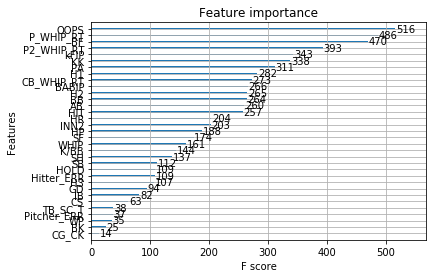

In [41]:
xgboost.plot_importance(xgb)

In [42]:
xgb.score(X_train, y_train)

0.9620902675766665

In [43]:
xgb.score(X_test, y_test)

0.8949259891915778

https://blog.naver.com/PostView.nhn?blogId=gustn3964&logNo=221431714122
 min_child_weight (클수록 모델이 더 보수적) /
 max_depth / 
 gamma (클수록 더 보수적) 는 반드시 조정
 
https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster

In [48]:
best_score=0
for n_estimator in [100, 200, 400, 600]:
    for learning_rate in [0.01, 0.05, 0.1, 0.15, 0.2]:
        for gamma in [0.5, 1, 1.5, 2, 5]:
            for max_depth in [1,4,6,9]:
                for min_child_weight in [0,1,3,5]:
                    xgb= XGBRegressor(n_estimators=n_estimator,
                                      learning_rate=learning_rate,           
                                      gamma= gamma,
                                      max_depth=max_depth,
                                      min_child_weight=min_child_weight,objective ='reg:squarederror')
                    xgb.fit(X_train, y_train)
                    score=xgb.score(X_test, y_test)
                
                    if score > best_score:
                        best_score = score
                        best_parameters = {'n_estimators':n_estimator, 'max_depth' : max_depth,
                                            'min_samples_split' : min_samples_split,
                                            'max_features':max_features}
                    
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.90
Best parameters: {'n_estimators': 400, 'max_depth': 4, 'min_samples_split': 0.1, 'max_features': 'sqrt'}


## lightgbm

### 여기부터는 무시하고 뒷부분부터 보시면 됩니다~~

In [49]:
import lightgbm as lgb

In [50]:
train_ds = lgb.Dataset(X_train, label = y_train) 
test_ds = lgb.Dataset(X_test, label = y_test) 

In [51]:
params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2018}

In [52]:
model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 3.23387
[200]	valid_0's l2: 1.72677
[300]	valid_0's l2: 1.43917
[400]	valid_0's l2: 1.36614
[500]	valid_0's l2: 1.34367
[600]	valid_0's l2: 1.3318
[700]	valid_0's l2: 1.33442
Early stopping, best iteration is:
[667]	valid_0's l2: 1.32986


In [57]:
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

In [59]:
mse = mean_squared_error(y_test, predict_test) #score가 잘 안구해져서 mse로 구했음
print(mse)

1.3298583099311398


https://greatjoy.tistory.com/72 하이퍼파라미터 참고

In [67]:
from sklearn.metrics import accuracy_score

In [75]:
best_mse=0
for n_estimator in [100, 300, 600]:
    for learning_rate in [0.01, 0.05, 0.1, 0.2]:
        for boosting in ['gbdt','dart']:
            for max_depth in [-1,4,6,9]:
                params={'learning_rate': learning_rate, 'max_depth': max_depth, 
                            'boosting': boosting, 'objective': 'regression', 
                            'metric': 'mse', 'is_training_metric': True, 
                            'feature_fraction': 0.9}
                model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)
                y_pred = model.predict(X_test)
                mse = mean_squared_error(y_test, y_pred)
                
                if mse < best_mse:
                        best_mse = mse
                        best_parameters = params
                        
print("Best mse: {:.2f}".format(best_mse))
print("Best parameters: {}".format(best_parameters))

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 3.48129
[200]	valid_0's l2: 1.88349
[300]	valid_0's l2: 1.51936
[400]	valid_0's l2: 1.40401
[500]	valid_0's l2: 1.36715
[600]	valid_0's l2: 1.34676
[700]	valid_0's l2: 1.33441
[800]	valid_0's l2: 1.32363
[900]	valid_0's l2: 1.31656
[1000]	valid_0's l2: 1.31097
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 1.31097
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 3.70521
[200]	valid_0's l2: 2.04738
[300]	valid_0's l2: 1.6355
[400]	valid_0's l2: 1.50333
[500]	valid_0's l2: 1.4434
[600]	valid_0's l2: 1.40682
[700]	valid_0's l2: 1.38556
[800]	valid_0's l2: 1.36863
[900]	valid_0's l2: 1.35659
[1000]	valid_0's l2: 1.34761
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 1.34761
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 3.48057
[200]	valid_0's l2: 1.89263
[300]	valid_0's l2: 1.52739
[400]	valid_0's 

In [83]:
best_score=0 
for n_estimator in [100, 300, 600]:
    for learning_rate in [0.01, 0.05, 0.1, 0.2]:
        for boosting in ['gbdt','dart']:
            for max_depth in [-1,4,6,9]:
                params={'n_estimators':n_estimator ,'learning_rate': learning_rate, 'max_depth': max_depth, 
                            'boosting': boosting, 'objective': 'regression', 
                            'metric': 'mse', 'is_training_metric': True, 
                            'feature_fraction': 0.9}
                model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)
                y_pred = model.predict(X_test)
                score= accuracy_score(y_test, y_pred)
                
                if score > best_score:
                        best_score = score
                        best_parameters = params
                        
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Training until validation scores don't improve for 100 rounds
[100]	valid_0's l2: 3.48129
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 3.48129


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

### 여기서부터 보시면 됩니다~~~

In [85]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(n_estimators=200)

In [86]:
lgbm=LGBMRegressor(n_estimators=500, learning_rate=0.1, max_depth=4)
lgbm.fit(X_train,y_train)
lgbm_pred=xgb.predict(X_test)

In [87]:
print(lgbm.score(X_train, y_train))
print(lgbm.score(X_test, y_test))

0.9581624716310267
0.8944153514504809


In [91]:
best_score=0
for n_estimator in [100, 300, 600]:
    for learning_rate in [0.01, 0.05, 0.1, 0.2]:
        for boosting in ['gbdt','dart']:
            for max_depth in [-1,4,6,9]:
                lgbm= LGBMRegressor(n_estimators=n_estimator,
                                      learning_rate=learning_rate,           
                                      boosting= boosting,
                                      max_depth=max_depth)
                lgbm.fit(X_train, y_train)
                score=lgbm.score(X_test, y_test)
                
                if score > best_score:
                        best_score = score
                        best_parameters = {'n_estimators':n_estimator, 'max_depth' : max_depth,
                                            'learning_rate' : learning_rate,
                                            'boosting':boosting}
                    
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.90
Best parameters: {'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.2, 'boosting': 'dart'}


In [92]:
from sklearn.model_selection import GridSearchCV


lgbm_param_grid={'n_estimator': [100, 300, 600],
                 'learning_rate' : [0.01, 0.05, 0.1, 0.2],
                 'boosting' : ['gbdt','dart'],
                 'max_depth' : [-1,4,6,9]
}

grid_search= GridSearchCV(lgbm, lgbm_param_grid, n_jobs=-1, verbose=1)
grid_result= grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 26.4min finished
